In [1]:
"""
    --> KMZ file'ının okunması için oluşturulan script.
    --> İlgili fonksiyonlar aşağıdaki siteden temin edild,:
            https://ocefpaf.github.io/python4oceanographers/blog/2013/06/24/aviso_tracks/
"""

"\n    --> KMZ file'ının okunması için oluşturulan script.\n    --> İlgili fonksiyonlar aşağıdaki siteden temin edild,:\n            https://ocefpaf.github.io/python4oceanographers/blog/2013/06/24/aviso_tracks/\n"

In [2]:
import sys

if sys.version_info >= (3, 6):
    import zipfile
else:
    import zipfile36 as zipfile
    
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from fastkml.kml import KML

In [3]:
""" KMZ dosyalarının okunması için fonksiyon"""

def read_kmz(fname):
    r"""Reads AVISO kmz file and return a dictionary with tracks as
    keys and position (lon, lat) as values."""
    zfile = zipfile.ZipFile(fname)
    kml_string = zfile.read(zfile.filelist[0].filename)

    kml = KML()
    kml.from_string(kml_string)
    Document, Folder, SubFolder, PlaceMark = [], [], [], []
    tracks, points = dict(), dict()
    for Document_feat in kml.features():  # 1 level.
        Document.append(Document_feat)
        for Folder_feat in Document_feat.features():  # 2 levels: lines and dots.
            Folder.append(Folder_feat)
            for SubFolder_feat in Folder_feat.features():  # 20 levels.
                SubFolder.append(SubFolder_feat)
                for PlaceMark_feat in SubFolder_feat.features():
                    if PlaceMark_feat.styleUrl == '#LINE':  # 254 levels (tracks).
                        PlaceMark.append(PlaceMark_feat)
                        track = PlaceMark_feat.name
                        pos = PlaceMark_feat.geometry.xy
                        tracks.update({track: pos})
                    if PlaceMark_feat.styleUrl == '#DOT':
                        track = PlaceMark_feat.name
                        pos = PlaceMark_feat.geometry.wkt
                        points.update({track: pos})
    return tracks

In [4]:
""" Orbit tracklarının çizdirilmesi için fonksiyon"""

def plt_tracks(tracks, color, **kw):
    for track, (lon, lat) in tracks.items():
        lon, lat = map(np.array, (lon, lat))
        # Prevent matplotlib from connecting the lines.
        mask = lon >=0
        m.plot(*m(lon[mask], lat[mask]), color=color, **kw)
        m.plot(*m(lon[~mask], lat[~mask]), color=color, **kw)

In [5]:
#Harita Üretimi

def make_map(lonStart=24, lonEnd=45, latStart=33, latEnd=45,
             image=None):
    fig, ax = plt.subplots(figsize=(18, 12))
    # Setted for nautical chart 01.
    m = Basemap(projection='merc', llcrnrlon=24, urcrnrlon=45,
                llcrnrlat=33, urcrnrlat=45, lat_ts=26, resolution='h')
    m.ax = ax

    if image:
        img = plt.imread(image)
        m.imshow(img, origin='upper', alpha=0.45)
    else:
        m.drawcoastlines()
        m.fillcontinents()

    lon_lim, lat_lim = m([lonStart, lonEnd], [latStart, latEnd])
    m.ax.axis([lon_lim[0], lon_lim[1], lat_lim[0], lat_lim[1]])

    meridians = np.arange(lonStart, lonEnd, 1.5)
    parallels = np.arange(latStart,  latEnd, 1.5)
    xoffset = -lon_lim[0] + 1e4
    yoffset = -lat_lim[0] + 1e4
    kw = dict(linewidth=0)
    m.drawparallels(parallels, xoffset=xoffset, labels=[1, 0, 0, 0], **kw)
    m.drawmeridians(meridians, yoffset=yoffset, labels=[0, 0, 0, 1], **kw)
    
    return fig, m

In [6]:
""" En yakın trackların bulunması"""

def knn_search(x, D, n):
    ndata = D.shape[1]
    n = n if n < ndata else ndata
    sqd = np.sqrt(((D - x[:, :ndata]) ** 2).sum(axis=0))
    return sqd

def find_nearst_track(tracks, point=(-44, -28.5)):
    name, dist = None, 1e4
    point = np.atleast_2d(point).T
    for track, data in tracks.items():
        data = np.atleast_2d(data)
        new_dist = knn_search(point, data, 1).min()
        if new_dist < dist:
            name = track
            dist = new_dist
    print("Nearest track: %s" % name)
    return tracks[name]

Nearest track: Ground Track 239


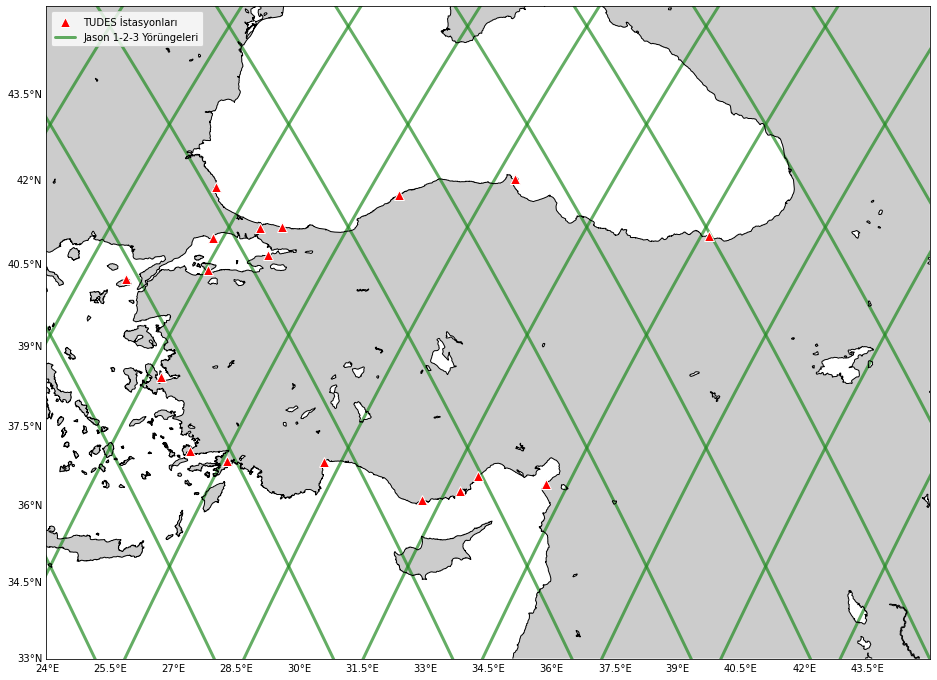

In [13]:
tracks = read_kmz('/home/furkan/Downloads/Visu_RefOrbit_J3J2J1TP_Tracks_GoogleEarth_V3.kmz')

fig, m = make_map()
lon, lat = -44, -28.5  # Some Buoy.
kw = dict(marker='^', linestyle='none', markersize=10, markeredgecolor='w', zorder=2)

#TUDES İSTASYONLARI 
m.plot(*m(28.02351594, 41.88890424), label='TUDES İstasyonları', markerfacecolor='#FF0000', **kw)
m.plot(*m(29.07412648, 41.15984017), markerfacecolor='#FF0000', **kw)
m.plot(*m(29.60537553, 41.17636462), markerfacecolor='#FF0000', **kw)
m.plot(*m(32.39032924, 41.74398816), markerfacecolor='#FF0000', **kw)
m.plot(*m(35.14945865, 42.02306816), markerfacecolor='#FF0000', **kw)
m.plot(*m(39.74454939, 41.00197800), markerfacecolor='#FF0000', **kw)
m.plot(*m(27.96215236, 40.96896672), markerfacecolor='#FF0000', **kw)
m.plot(*m(29.27760959, 40.66197489), markerfacecolor='#FF0000', **kw)
m.plot(*m(27.84518123, 40.38988004), markerfacecolor='#FF0000', **kw)
m.plot(*m(25.89349329, 40.23171234), markerfacecolor='#FF0000', **kw)
m.plot(*m(26.72214568, 38.42960155), markerfacecolor='#FF0000', **kw)
m.plot(*m(27.42345750, 37.03217553), markerfacecolor='#FF0000', **kw)
m.plot(*m(28.28226596, 36.84867631), markerfacecolor='#FF0000', **kw)
m.plot(*m(30.60868263, 36.83042146), markerfacecolor='#FF0000', **kw)
m.plot(*m(32.94011772, 36.09619554), markerfacecolor='#FF0000', **kw)
m.plot(*m(33.83622766, 36.28146292), markerfacecolor='#FF0000', **kw)
m.plot(*m(34.25539255, 36.56372030), markerfacecolor='#FF0000', **kw)
m.plot(*m(35.88519394, 36.41558863), markerfacecolor='#FF0000', **kw)
    
# Altimeter tracks.
kw = dict(alpha=0.7, linewidth=3, solid_capstyle='round', zorder=1)
plt_tracks(tracks, color='forestgreen', **kw)

#Kullanma nedenim lejanttan dolayı
# Closest track to the buoy.
lon, lat = find_nearst_track(tracks, point=(lon, lat))
m.plot(*m(lon, lat), label=u'Jason 1-2-3 Yörüngeleri', color='forestgreen', **kw)
_ = m.ax.legend(numpoints=1, loc=2)



In [ ]:
#İstasyon isimlerini yazdırmak için
latsf = [41.88890424, 41.15984017, 41.17636462, 41.74398816, 42.02306816, 41.00197800, 40.96896672, 
        40.66197489, 40.38988004, 40.23171234, 38.42960155, 37.03217553, 36.84867631, 36.83042146,
        36.09619554, 36.28146292, 36.56372030, 36.41558863]

lonsf = [28.02351594, 29.07412648, 29.60537553, 32.39032924, 35.14945865, 39.74454939, 27.96215236,
         29.27760959, 27.84518123, 25.89349329, 26.72214568, 27.42345750, 28.28226596, 30.60868263,
         32.94011772, 33.83622766, 34.25539255, 35.88519394]

namesf = ["IADA", "ISTN", "SILE", "AMSR", "SNOP", "TRBZ", "MERG", "YLVA", "ERDK", "GADA", "MNTS",
          "BDRM", "AKSA", "ANTL", "BZYZ", "TSCU", "ERDM", "ARSZ"]